### Importing packages

In [571]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns
import re

import nltk
import csv
import nltk.tokenize 
from nltk.tokenize import word_tokenize
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Loading dataset

In [572]:
data_csv = pd.read_csv(r"C:\UCD\Modules\Summer\Week 02\ML_Project\21206774.csv",encoding='utf-8', header=0, index_col = False)
data_csv

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,TRAVEL,A Brief Travel Guide to the Republic of Macedonia,"Sucheta Rawal, Contributor\nTravel Writer, Fou...",https://www.huffingtonpost.com/entry/a-brief-t...,What comes to mind when you hear about Republi...,10/28/2013
1,1,TRAVEL,Best Ice Cream Sandwich Parlors in the U.S.,"MiniTime, Contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,Ice cream is arguably the one dessert that eve...,8/10/2014
2,2,TRAVEL,Antarctica: Pole to Soul Part 3,"Ed Gillespie, ContributorAuthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,The Patagonian Linea Sur ('Southern Line' -- n...,1/31/2016
3,3,WEIRD NEWS,Man Gets $117 Traffic Ticket After Singing '90...,David Moye,https://www.huffingtonpost.com/entry/taoufik-m...,Police reportedly ticketed Taofik Moalla for s...,10/23/2017
4,4,TRAVEL,Man-tastic Vacations in Paso Robles Wine Country,"Tina Swithin, Contributor\nAuthor, Advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""Must dos"" for your man-cation to Paso Robles.",5/29/2013
...,...,...,...,...,...,...,...
7961,7995,WEIRD NEWS,An Italian Stylist Builds A Hair-Raising Autom...,David Moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“We shampoo it, we brush it, we trim it,"" she ...",11/18/2017
7962,7996,WEIRD NEWS,Video Of Mountain Biker's Wild Ride Will Terri...,Carla Herreria,https://www.huffingtonpost.com/entry/mountain-...,"""This bear came out of nowhere and was gone be...",6/21/2016
7963,7997,TRAVEL,Let Loose the Sled Dogs of War in the Depths o...,"Mike Arkus, ContributorJournalist",https://www.huffingtonpost.com/entry/let-loose...,You don't try and pet the Greenland sled dog w...,4/12/2015
7964,7998,TRAVEL,Explore America: Nebraska's Prairie 'Chickens ...,"CarsTravelFood, Contributor\nBlog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,If you're already in Nebraska for the annual S...,4/22/2012


### Pre-analysis exploring and cleaning process

In [573]:
# The first 10 records
data_csv.head(10)

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,TRAVEL,A Brief Travel Guide to the Republic of Macedonia,"Sucheta Rawal, Contributor\nTravel Writer, Fou...",https://www.huffingtonpost.com/entry/a-brief-t...,What comes to mind when you hear about Republi...,10/28/2013
1,1,TRAVEL,Best Ice Cream Sandwich Parlors in the U.S.,"MiniTime, Contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,Ice cream is arguably the one dessert that eve...,8/10/2014
2,2,TRAVEL,Antarctica: Pole to Soul Part 3,"Ed Gillespie, ContributorAuthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,The Patagonian Linea Sur ('Southern Line' -- n...,1/31/2016
3,3,WEIRD NEWS,Man Gets $117 Traffic Ticket After Singing '90...,David Moye,https://www.huffingtonpost.com/entry/taoufik-m...,Police reportedly ticketed Taofik Moalla for s...,10/23/2017
4,4,TRAVEL,Man-tastic Vacations in Paso Robles Wine Country,"Tina Swithin, Contributor\nAuthor, Advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""Must dos"" for your man-cation to Paso Robles.",5/29/2013
5,5,TRAVEL,Flight Attendants Dish On Their Jobs,"George Hobica, Contributor\nSyndicated travel ...",https://www.huffingtonpost.com/entry/flight-at...,'You just know that the suit-and-tie traveler ...,9/8/2012
6,6,TRAVEL,Disneyland Travel: Did You Know These Attracti...,NaN,https://www.huffingtonpost.com/entry/disneylan...,It's no secret which movies served as inspirat...,9/17/2012
7,7,TRAVEL,Why The Azores Are The Best European Island De...,"Sandra Henriques Gajjar, ContributorWriter",https://www.huffingtonpost.com/entry/why-the-a...,"For Outdoors and Diving Fans Now, where should...",8/7/2016
8,8,WEIRD NEWS,Student Sinks Impossible Shot To Secure Entire...,Steven Hoffer,https://www.huffingtonpost.com/entry/ohio-stat...,Total disorder.,9/3/2016
9,9,TRAVEL,How Travel Stopped Me Worrying About The Unknown,"Melissa Douglas, ContributorFreelance Travel W...",https://www.huffingtonpost.com/entry/how-trave...,"With unexpected curve-balls, come unexpected o...",11/10/2017


In [574]:
# The last 10 records
data_csv.tail(10)

,Unnamed: 0,category,headline,authors,link,short_description,date
7956,7990,TRAVEL,On The Road To Marrakech,"Stewart A. Swerdlow, Contributor\nAuthor, Lect...",https://www.huffingtonpost.com/entry/on-the-ro...,"After over 30 years of traveling the globe, I ...",9/13/2012
7957,7991,TRAVEL,When Letting Go On Vacation Isn't Easy,"Lev Raphael, Contributor\nAuthor, Reviewer, Bl...",https://www.huffingtonpost.com/entry/letting-g...,"On a recent trip to Florence, I did something ...",7/17/2012
7958,7992,TRAVEL,World's Longest Airport Walks Between Entrance...,NaN,https://www.huffingtonpost.com/entry/worlds-lo...,"Earlier this week, the Atlanta Journal-Constit...",8/15/2012
7959,7993,TRAVEL,Woman Strips Naked At Denver Airport,NaN,https://www.huffingtonpost.com/entry/woman-str...,Passengers stripping at airports has happened ...,4/10/2012
7960,7994,TRAVEL,6 Game-Changing Travel Gadgets Under $10,"Thrillist, ContributorEverything worth caring ...",https://www.huffingtonpost.com/entry/6-life-sa...,Beyond using them to transport TSA-approved li...,4/7/2015
7961,7995,WEIRD NEWS,An Italian Stylist Builds A Hair-Raising Autom...,David Moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“We shampoo it, we brush it, we trim it,"" she ...",11/18/2017
7962,7996,WEIRD NEWS,Video Of Mountain Biker's Wild Ride Will Terri...,Carla Herreria,https://www.huffingtonpost.com/entry/mountain-...,"""This bear came out of nowhere and was gone be...",6/21/2016
7963,7997,TRAVEL,Let Loose the Sled Dogs of War in the Depths o...,"Mike Arkus, ContributorJournalist",https://www.huffingtonpost.com/entry/let-loose...,You don't try and pet the Greenland sled dog w...,4/12/2015
7964,7998,TRAVEL,Explore America: Nebraska's Prairie 'Chickens ...,"CarsTravelFood, Contributor\nBlog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,If you're already in Nebraska for the annual S...,4/22/2012
7965,7999,WEIRD NEWS,BEHOLD THE TINY DUMPLINGS!,Jenna Amatulli,https://www.huffingtonpost.com/entry/tiny-dump...,"We got dumps like a truck, truck, truck.",10/14/2015


#### Data exploration and initial organising

In [575]:
# Display all the columns where the values are null
data_csv.isnull().sum()

Unnamed: 0              0
category                0
headline                0
authors              1151
link                   11
short_description     659
date                   10
dtype: int64

#### fixing the cells with null values

In [576]:
# Replacing the null cells with some values
data_csv["short_description"] = data_csv["short_description"].fillna("no_description")

In [577]:
data_csv["headline"] = data_csv["headline"].dropna()

In [749]:
# Drop the empty records
data_csv["category"] = data_csv["category"].dropna()

In [579]:
data_csv["date"] = data_csv["date"].fillna("no_date")

In [580]:
data_csv["authors"] = data_csv["authors"].fillna("no_authors")

In [581]:
data_csv["link"] = data_csv["link"].fillna("no_link")

In [582]:
# make shure the dataset is fixed and no null values are there any more.

data_csv.isnull().sum()

Unnamed: 0           0
category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [583]:
# Convert the whole csv to lowercase
data_csv = data_csv.applymap(lambda s: s.lower() if type(s) == str else s)

## https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas

In [584]:
# Save to a new csv output file
data_csv.to_csv('C:/UCD/Modules/Summer/Week 02/ML_Project/outputfile.csv', encoding='utf-8')

In [585]:
# load the new dataset
newdata_csv = pd.read_csv(r"C:\UCD\Modules\Summer\Week 02\ML_Project\outputfile.csv",encoding='utf-8', header=0, index_col = False)
newdata_csv

,Unnamed: 0.1,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,0,travel,a brief travel guide to the republic of macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013
1,1,1,travel,best ice cream sandwich parlors in the u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014
2,2,2,travel,antarctica: pole to soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016
3,3,3,weird news,man gets $117 traffic ticket after singing '90...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017
4,4,4,travel,man-tastic vacations in paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013
...,...,...,...,...,...,...,...,...
7961,7961,7995,weird news,an italian stylist builds a hair-raising autom...,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017
7962,7962,7996,weird news,video of mountain biker's wild ride will terri...,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016
7963,7963,7997,travel,let loose the sled dogs of war in the depths o...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015
7964,7964,7998,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012


In [586]:
# Delete all the "Unnamed" columns
newdata_csv.drop(newdata_csv.filter(regex="Unnamed"),axis=1, inplace=True)

#### I manually removed the extra unnamed columns and gave the name "index" to the first column

In [587]:
# Check the the remaining null values through the whole dataset
newdata_csv.isnull().any()

category             False
headline             False
authors              False
link                 False
short_description    False
date                 False
dtype: bool

In [588]:
# classify the categories
newdata_csv["headline"] = newdata_csv["headline"].dropna()

In [589]:
newdata_csv.dropna(subset=['headline'])

,category,headline,authors,link,short_description,date
0,travel,a brief travel guide to the republic of macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013
1,travel,best ice cream sandwich parlors in the u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014
2,travel,antarctica: pole to soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016
3,weird news,man gets $117 traffic ticket after singing '90...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017
4,travel,man-tastic vacations in paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013
...,...,...,...,...,...,...
7961,weird news,an italian stylist builds a hair-raising autom...,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017
7962,weird news,video of mountain biker's wild ride will terri...,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016
7963,travel,let loose the sled dogs of war in the depths o...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015
7964,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012


In [590]:
newdata_csv['category'].value_counts()

travel        5976
weird news    1990
Name: category, dtype: int64

C:\Users\amera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

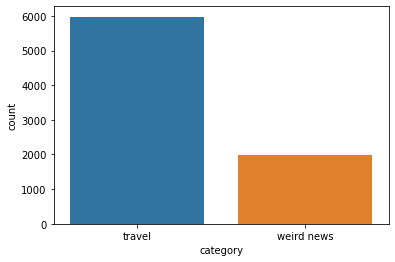

In [591]:
# Visualize the category data
sns.countplot(newdata_csv.category)
## https://seaborn.pydata.org/generated/seaborn.countplot.html

In [592]:
#Creat additional column with the length for each headline 
#and short description columns 
   

newdata_csv ['hd_length']= newdata_csv['headline'].str.len()
newdata_csv ['short_des']= newdata_csv['short_description'].str.len()
print (newdata_csv ['hd_length'])
print (newdata_csv ['short_des'])


0        49
1        43
2        31
3        64
4        48
       ... 
7961     51
7962     52
7963    125
7964     71
7965     26
Name: hd_length, Length: 7966, dtype: int64
0       255
1       196
2       183
3        55
4        46
       ... 
7961     70
7962     84
7963    176
7964    263
7965     40
Name: short_des, Length: 7966, dtype: int64


In [593]:
newdata_csv

,category,headline,authors,link,short_description,date,hd_length,short_des
0,travel,a brief travel guide to the republic of macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255
1,travel,best ice cream sandwich parlors in the u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196
2,travel,antarctica: pole to soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183
3,weird news,man gets $117 traffic ticket after singing '90...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55
4,travel,man-tastic vacations in paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46
...,...,...,...,...,...,...,...,...
7961,weird news,an italian stylist builds a hair-raising autom...,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017,51,70
7962,weird news,video of mountain biker's wild ride will terri...,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016,52,84
7963,travel,let loose the sled dogs of war in the depths o...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015,125,176
7964,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012,71,263


C:\Users\amera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Headlines Distribution')

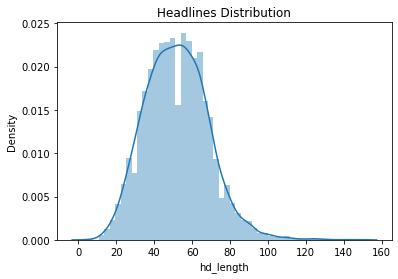

In [750]:
#visualize the headline distribution
sns.distplot(newdata_csv['hd_length']).set_title('Headlines Distribution')

## https://seaborn.pydata.org/generated/seaborn.distplot.html

C:\Users\amera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Short Description Distribution')

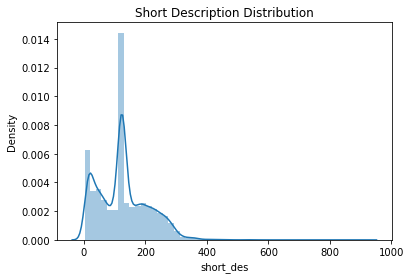

In [595]:
#visualize the headline distribution
sns.distplot(newdata_csv['short_des']).set_title('Short Description Distribution')

#### From the readings of the up-generated visualizations, I suspect that there is some mixing between the headlines and the short description in the dataset, which refers to the missing data from "short decription" column.

### NLT process

In [596]:
## https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas

# Recognise and remove the punctuation
newdata_csv['headline'].str.replace('[^\w\s]','')


C:\Users\amera\AppData\Local\Temp\ipykernel_11824\3418245975.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdata_csv['headline'].str.replace('[^\w\s]','')


0       a brief travel guide to the republic of macedonia
1               best ice cream sandwich parlors in the us
2                          antarctica pole to soul part 3
3       man gets 117 traffic ticket after singing 90s ...
4         mantastic vacations in paso robles wine country
                              ...                        
7961    an italian stylist builds a hairraising automo...
7962    video of mountain bikers wild ride will terrif...
7963    let loose the sled dogs of war in the depths o...
7964    explore america nebraskas prairie chickens and...
7965                            behold the tiny dumplings
Name: headline, Length: 7966, dtype: object

In [597]:
# Tokenize the headline column
headlines = newdata_csv['headline']
headlines = [nltk.word_tokenize(headline) for headline in headlines]
stop_words = set(stopwords.words('english'))


headlines

[['a', 'brief', 'travel', 'guide', 'to', 'the', 'republic', 'of', 'macedonia'],
 ['best', 'ice', 'cream', 'sandwich', 'parlors', 'in', 'the', 'u.s', '.'],
 ['antarctica', ':', 'pole', 'to', 'soul', 'part', '3'],
 ['man',
  'gets',
  '$',
  '117',
  'traffic',
  'ticket',
  'after',
  'singing',
  "'90s",
  'dance',
  'hit',
  'in',
  'car'],
 ['man-tastic', 'vacations', 'in', 'paso', 'robles', 'wine', 'country'],
 ['flight', 'attendants', 'dish', 'on', 'their', 'jobs'],
 ['disneyland',
  'travel',
  ':',
  'did',
  'you',
  'know',
  'these',
  'attractions',
  'were',
  'inspired',
  'by',
  'movies',
  '?'],
 ['why',
  'the',
  'azores',
  'are',
  'the',
  'best',
  'european',
  'island',
  'destination',
  'for',
  'all',
  'types',
  'of',
  'travelers'],
 ['student',
  'sinks',
  'impossible',
  'shot',
  'to',
  'secure',
  'entire',
  'class',
  '100s',
  'on',
  'organic',
  'chemistry',
  'quiz'],
 ['how', 'travel', 'stopped', 'me', 'worrying', 'about', 'the', 'unknown'],
 [

In [598]:
# Remove the stopwords from the headline column, and untkenize the words
## https://www.datasnips.com/58/remove-stop-words-from-text-in-dataframe-column/

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
newdata_csv['headline'] = newdata_csv['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [599]:
# Assigning the tokenized headline words to anew column "tokenized_headlines"
newdata_csv ['tokenized_headlines'] = newdata_csv ['headline']

In [600]:
newdata_csv.head()

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines
0,travel,brief travel guide republic macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255,brief travel guide republic macedonia
1,travel,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.
2,travel,antarctica: pole soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183,antarctica: pole soul part 3
3,weird news,man gets $117 traffic ticket singing '90s danc...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55,man gets $117 traffic ticket singing '90s danc...
4,travel,man-tastic vacations paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46,man-tastic vacations paso robles wine country


#### Notes: I replaced the null values in all the columns with "no_headlines, No_short_desc,....".
#### After exploring and analyzing the data, I decided to work on the "headline" column since therer is only 14 headlines missing, while in the  "short decription" column is having 662 missing rows (around 9% of the dataset), so I decided not to depend on this column in this analysis. 
#### Then cleaned the data and removed all the punctuation and unnecessary words (stop words) and assigned the cleaned data to a new column "tokenized_headlines"


# Data preperation & modeling

### Encoding

In [601]:
# Applying label encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
newdata_csv['category_encoded'] = encoder.fit_transform(newdata_csv['category'])
newdata_csv

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,brief travel guide republic macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255,brief travel guide republic macedonia,0
1,travel,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.,0
2,travel,antarctica: pole soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183,antarctica: pole soul part 3,0
3,weird news,man gets $117 traffic ticket singing '90s danc...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55,man gets $117 traffic ticket singing '90s danc...,1
4,travel,man-tastic vacations paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46,man-tastic vacations paso robles wine country,0
...,...,...,...,...,...,...,...,...,...,...
7961,weird news,italian stylist builds hair-raising automobile,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017,51,70,italian stylist builds hair-raising automobile,1
7962,weird news,video mountain biker's wild ride terrify,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016,52,84,video mountain biker's wild ride terrify,1
7963,travel,let loose sled dogs war depths greenland's win...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015,125,176,let loose sled dogs war depths greenland's win...,0
7964,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012,71,263,explore america: nebraska's prairie 'chickens ...,0


In [602]:
# Saving the preprocessed file to avoid executing the whole process in case we closed Jupyter
# So we can start from the loading point of the preprocessed file. 
newdata_csv.to_csv('C:/UCD/Modules/Summer/Week 02/ML_Project/preprocessed_data.csv', encoding='utf-8')

In [603]:
# load the preprocessed_csv as a starting point

preprocessed_csv = pd.read_csv(r"C:\UCD\Modules\Summer\Week 02\ML_Project\preprocessed_data.csv",encoding='utf-8', header=0)
preprocessed_csv.drop(preprocessed_csv.filter(regex="Unnamed"),axis=1, inplace=True)
preprocessed_csv

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,brief travel guide republic macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255,brief travel guide republic macedonia,0
1,travel,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.,0
2,travel,antarctica: pole soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183,antarctica: pole soul part 3,0
3,weird news,man gets $117 traffic ticket singing '90s danc...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55,man gets $117 traffic ticket singing '90s danc...,1
4,travel,man-tastic vacations paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46,man-tastic vacations paso robles wine country,0
...,...,...,...,...,...,...,...,...,...,...
7961,weird news,italian stylist builds hair-raising automobile,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017,51,70,italian stylist builds hair-raising automobile,1
7962,weird news,video mountain biker's wild ride terrify,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016,52,84,video mountain biker's wild ride terrify,1
7963,travel,let loose sled dogs war depths greenland's win...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015,125,176,let loose sled dogs war depths greenland's win...,0
7964,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012,71,263,explore america: nebraska's prairie 'chickens ...,0


In [604]:
preprocessed_csv

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,brief travel guide republic macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255,brief travel guide republic macedonia,0
1,travel,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.,0
2,travel,antarctica: pole soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183,antarctica: pole soul part 3,0
3,weird news,man gets $117 traffic ticket singing '90s danc...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55,man gets $117 traffic ticket singing '90s danc...,1
4,travel,man-tastic vacations paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46,man-tastic vacations paso robles wine country,0
...,...,...,...,...,...,...,...,...,...,...
7961,weird news,italian stylist builds hair-raising automobile,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017,51,70,italian stylist builds hair-raising automobile,1
7962,weird news,video mountain biker's wild ride terrify,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016,52,84,video mountain biker's wild ride terrify,1
7963,travel,let loose sled dogs war depths greenland's win...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015,125,176,let loose sled dogs war depths greenland's win...,0
7964,travel,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012,71,263,explore america: nebraska's prairie 'chickens ...,0


In [605]:
preprocessed_csv['category_encoded'].value_counts()
# 0 is for the titles with no category, 1 is for the travel news category, 2 is for the weird news

0    5976
1    1990
Name: category_encoded, dtype: int64

### Splitting and training the data

In [606]:
from sklearn.model_selection import train_test_split

X = preprocessed_csv['tokenized_headlines'] # The data
y = preprocessed_csv['category_encoded'] #The target

X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, y, random_state=0, test_size = 0.3, train_size = 0.7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_plus_valid, y_train_plus_valid, random_state=0, test_size = 0.199/0.7, train_size = 0.5/0.7)


In [607]:
train = X_train, y_train
valid = X_valid, y_valid
test = X_test, y_test

In [608]:
train

(6382              cycling canada stihl tour des trees
 676                                   48 hours lisbon
 6857       meeting dennis rodman's dad philippine bar
 5827           get trump's voice gps we're masochists
 6103                 man caught trying sex camper van
                             ...                      
 5909            europe's 10 coziest mountain villages
 3256                       antarctic plateau (day 52)
 2146           rosanne cash writes theme song america
 6592                          7 foods avoid traveling
 5774    best u.s. cities affordable getaways (photos)
 Name: tokenized_headlines, Length: 3982, dtype: object,
 6382    0
 676     0
 6857    0
 5827    1
 6103    1
        ..
 5909    0
 3256    0
 2146    0
 6592    0
 5774    0
 Name: category_encoded, Length: 3982, dtype: int64)

In [609]:
valid

(7723            18 reasons kenya needs higher bucket list
 164     fireball comes boxes -- time trump's inaugurat...
 6347    deserts three continents, part 1 -- gobi: sand...
 1165                          10 places gone 10 years ago
 4513           4 b&bs promise unique experiences (photos)
                               ...                        
 1428      uk travel: alternative british summer (graphic)
 4066                                  go holiday holidays
 7396                       one, three five hours florence
 756                       that's airplanes still ashtrays
 7230    secret gardens perfect little surprises cities...
 Name: tokenized_headlines, Length: 1586, dtype: object,
 7723    0
 164     1
 6347    0
 1165    0
 4513    0
        ..
 1428    0
 4066    0
 7396    0
 756     0
 7230    0
 Name: category_encoded, Length: 1586, dtype: int64)

In [610]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_valid shape: {}".format(y_train.shape))
print("y valid shape: {}".format(y_test.shape))

X_train shape: (3982,)
X_test shape: (2390,)
y_train shape: (3982,)
y_test shape: (2390,)
X_valid shape: (3982,)
y valid shape: (2390,)


In [611]:
X = preprocessed_csv.iloc[:,1:65]
X

,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,brief travel guide republic macedonia,"sucheta rawal, contributor\ntravel writer, fou...",https://www.huffingtonpost.com/entry/a-brief-t...,what comes to mind when you hear about republi...,10/28/2013,49,255,brief travel guide republic macedonia,0
1,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.,0
2,antarctica: pole soul part 3,"ed gillespie, contributorauthor, futurist, cam...",https://www.huffingtonpost.com/entry/antarctic...,the patagonian linea sur ('southern line' -- n...,1/31/2016,31,183,antarctica: pole soul part 3,0
3,man gets $117 traffic ticket singing '90s danc...,david moye,https://www.huffingtonpost.com/entry/taoufik-m...,police reportedly ticketed taofik moalla for s...,10/23/2017,64,55,man gets $117 traffic ticket singing '90s danc...,1
4,man-tastic vacations paso robles wine country,"tina swithin, contributor\nauthor, advocate an...",https://www.huffingtonpost.com/entry/mantastic...,"""must dos"" for your man-cation to paso robles.",5/29/2013,48,46,man-tastic vacations paso robles wine country,0
...,...,...,...,...,...,...,...,...,...
7961,italian stylist builds hair-raising automobile,david moye,https://www.huffingtonpost.com/entry/hairy-aut...,"“we shampoo it, we brush it, we trim it,"" she ...",11/18/2017,51,70,italian stylist builds hair-raising automobile,1
7962,video mountain biker's wild ride terrify,carla herreria,https://www.huffingtonpost.com/entry/mountain-...,"""this bear came out of nowhere and was gone be...",6/21/2016,52,84,video mountain biker's wild ride terrify,1
7963,let loose sled dogs war depths greenland's win...,"mike arkus, contributorjournalist",https://www.huffingtonpost.com/entry/let-loose...,you don't try and pet the greenland sled dog w...,4/12/2015,125,176,let loose sled dogs war depths greenland's win...,0
7964,explore america: nebraska's prairie 'chickens ...,"carstravelfood, contributor\nblog that encoura...",https://www.huffingtonpost.com/entry/explore-a...,if you're already in nebraska for the annual s...,4/22/2012,71,263,explore america: nebraska's prairie 'chickens ...,0


In [612]:
y

0       0
1       0
2       0
3       1
4       0
       ..
7961    1
7962    1
7963    0
7964    0
7965    1
Name: category_encoded, Length: 7966, dtype: int64

In [684]:
from sklearn.model_selection import train_test_split
#split the data into train valid and test set

#save the data
train.to_csv('train.csv',index=False)
valid.to_csv('valid.csv',index=False)
test.to_csv('test.csv', index=False)

#### Loading (training and validation csv files)

In [614]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression #A variant regression for classification tasks!
from sklearn.naive_bayes import GaussianNB as NaiveBayes
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score

In [615]:
train_csv = pd.read_csv('train.csv')

In [616]:
valid_csv = pd.read_csv('valid.csv')

In [617]:
test_csv = pd.read_csv('test.csv')

In [618]:
# AS we are working with text data, we will need to convert that text into numerical form
# I will use tfidf victorizer to do that task
# first we will need the following parameters for this task


# Parameters for the tfidf
ngram_range = (1, 2)
min_df = 10
max_df = 1.
max_features = 300

In [619]:
# tfidf victorizer
# Tomap the most frequent words and compute their occurance
vectorizer = TfidfVectorizer(encoding ='utf-8', ngram_range = ngram_range, 
                         lowercase = False, 
                        max_df = max_df, min_df = min_df,
                        max_features = max_features, norm = 'l2',# for normalization,
                        stop_words=None, sublinear_tf = True)

# Store all of the training data features in variables (to use them in the ML algorithms)
feature_store_train = vectorizer.fit_transform (X_train).toarray()
labels_train = y_train

#Store all of the validation data features
feature_store_valid = vectorizer.transform (X_valid).toarray()
labels_valid = y_valid

feature_store_test = vectorizer.transform (X_test).toarray()
labels_test = y_test

In [620]:
labels_train.shape # X train value

(3982,)

In [621]:
labels_valid.shape # X valid value

(1586,)

In [622]:
labels_test.shape # X test value

(2390,)

In [623]:
feature_store_train.shape # y train value

(3982, 300)

In [624]:
feature_store_valid.shape # y valid value

(1586, 300)

### Building classification models

**I will be using two clssifiers, LogisticRegression and KNeighbors as they can easily deal with text classification and match the text to the category it beelongs to.

In [625]:
# Applying LogisticRegression classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression()
lg.fit(feature_store_train, labels_train)

# Predict and evaluate the model using the accuracy metric
model_predictions = lg.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8623430962343096
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1806
           1       0.89      0.50      0.64       584

    accuracy                           0.86      2390
   macro avg       0.87      0.74      0.78      2390
weighted avg       0.87      0.86      0.85      2390



In [626]:
# Applying KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(feature_store_train, labels_train)

# Predict and evaluate the model using the accuracy metric
model_predictions = KNeighbors.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8175732217573222
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1806
           1       0.65      0.54      0.59       584

    accuracy                           0.82      2390
   macro avg       0.76      0.72      0.74      2390
weighted avg       0.81      0.82      0.81      2390



**Findings:
-LogisticsRegression classifier (lg) 
As we can notice the scores are good, between 0.86 and 0.98 ,however the category 1 achieved averagely relevant recall score (0.50) and the same for the f1 score (0.64).
-As for Kneighbors classifier (KNeighbors)
The accuracy score was almost the same as lg (0.81), and the other scores generally are good, however the scores of the category 1 which are relatively average 0.65 for precision, 0.54 for recall, and score of 0.59 for f1.

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2985
           1       0.91      0.54      0.68       997

    accuracy                           0.87      3982
   macro avg       0.89      0.76      0.80      3982
weighted avg       0.88      0.87      0.86      3982



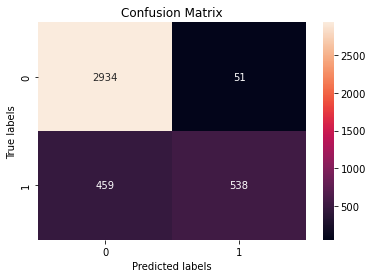

In [627]:
# Evaluation LogisticRegression using the confusion matrix
# I chose the confusion matrix to make sure the results are ok

X_cm = feature_store_train
y_true_labels = labels_train
model = lg

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

**The confusion matrix generated scores for lg shows almost the same ones of the same as the accuracy metric that I used in the LogisticRegression's classifier for the both categories 0 and 1 and that confirms the accuracy of the scores that I got in the lg classifier. 

**the plot is summerizing the values as following :TP score is 2934, TN is 538, FP is 51, FN is 459, FP is low which is a good indication, while the FN is a bit high

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2985
           1       0.78      0.62      0.69       997

    accuracy                           0.86      3982
   macro avg       0.83      0.78      0.80      3982
weighted avg       0.86      0.86      0.86      3982



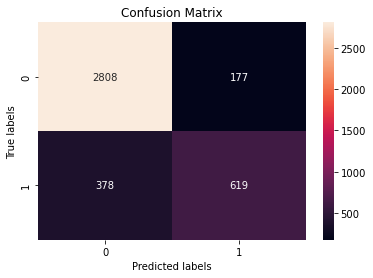

In [628]:
# Evaluation KNeighbors using the confusion matrix
X_cm = feature_store_train
y_true_labels = labels_train
model = KNeighbors

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

**We note a little improvement in the scores in general comparing to the accuracy metric that I used in the KNeighbors classifier. 
the plot is summerizing the values as following :TP score is 2808, TN is 619, FP is 177, FN is 378, FP is a bit low which is a good indication, while the FN is a bit high

### Evaluation of the performance of the models on the validation

In [629]:
# Applying LogisticRegression classifier on validation set 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression()
lg.fit(feature_store_valid, labels_valid)

# Predict and evaluate the model using the accuracy metric
model_predictions = lg.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8401673640167364
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1806
           1       0.89      0.39      0.55       584

    accuracy                           0.84      2390
   macro avg       0.86      0.69      0.72      2390
weighted avg       0.85      0.84      0.82      2390



              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1178
           1       0.95      0.51      0.66       408

    accuracy                           0.87      1586
   macro avg       0.90      0.75      0.79      1586
weighted avg       0.88      0.87      0.85      1586



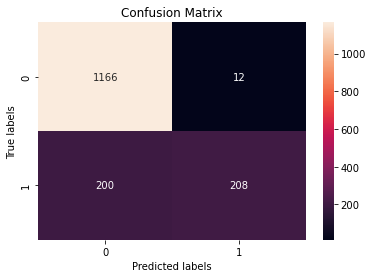

In [630]:
# Evaluating confusion matrix on the validation set (LogisticsRegression)

X_cm = feature_store_valid
y_true_labels = labels_valid
model = lg

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

**Applying LogisticRegression classifier on validation set shows good result generally, however the recall score for the category 1 is very low 0.39 and the precision is high 0.89, but with the confusion matrix the results get better (the precision is 95 and the recall is 0.51) however the accuracy scores for both the accuracy metric and the confusion matrix are quite similar.

**the plot is summerizing the values as following :TP score is 1166, TN is 208, FP is 12, FN is 200. FP is low which is a good indication, while the FN is a bit high

In [631]:
# Applying KNeighbors classifier with the validation dataset
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(feature_store_valid, labels_valid)

# Predict and evaluate the model using the accuracy metric
model_predictions = KNeighbors.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8142259414225942
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1806
           1       0.67      0.48      0.56       584

    accuracy                           0.81      2390
   macro avg       0.76      0.70      0.72      2390
weighted avg       0.80      0.81      0.80      2390



              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1178
           1       0.81      0.57      0.67       408

    accuracy                           0.86      1586
   macro avg       0.84      0.76      0.79      1586
weighted avg       0.85      0.86      0.85      1586



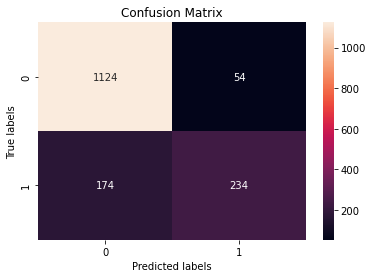

In [632]:
# Evaluating confusion matrix on the validation set (LogisticsRegression)

X_cm = feature_store_valid
y_true_labels = labels_valid
model = KNeighbors

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()   
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

**The results for the KNeighbors validation are almost the same with the both the accuracy metric and the confusion matrix are almost similar similar however the results becom a bit better after running the confusion matrix.

**the plot is summerizing the values as following :TP score is 1124, TN is 234, FP is 54, FN is 174. FP is low which is a good indication.

### Error analysis

In [633]:
# LogisticRegression misclassification rate
# I will be using the error rate equasion based on the values of the confusion matrix
# that I ran on each model 
## https://www.ritchieng.com/machine-learning-evaluate-classification-model/

FP = 51
FN = 459
TP = 2934
TN = 538
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.12807634354595682


In [634]:
# Kneighbors misclassification rate
FP = 177
FN = 378
TP = 2808
TN = 619
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.1393771973882471


In [635]:
# LogisticRegression on validation misclassification rate

FP = 12
FN = 200
TP = 1166
TN = 208
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.13366960907944514


In [636]:
# Kneighbors on validation misclassification rate

FP = 54
FN = 179
TP = 1124
TN = 234
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.1464487743557511


### Applying changes to test the classifiers

##### LogisticsRegression classifier

#### Hyperparameter tuning

In [637]:
# https://www.youtube.com/watch?v=nFna2s244vA&ab_channel=SolveBusinessProblemsUsingAnalytics

from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.1, 0.001, 1], 'penalty' : ['l1','l2']} #applying penalty in order to reduce overfitting
model = LogisticRegression()
clf = GridSearchCV(model, params_grid, cv = 3, verbose = 1)
bestF = clf.fit (feature_store_train, labels_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\amera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\amera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

In [638]:
# extract the best parameters out of the hyperparameter

bestF.best_params_

{'C': 1, 'penalty': 'l2'}

In [639]:
# Applying change to the LogisticRegression classifier according to the best parameter extracted

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression(C=1, penalty = 'l2')
lg.fit(feature_store_train, labels_train)

# Predict and evaluate the model using the accuracy metric
model_predictions = lg.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8623430962343096
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1806
           1       0.89      0.50      0.64       584

    accuracy                           0.86      2390
   macro avg       0.87      0.74      0.78      2390
weighted avg       0.87      0.86      0.85      2390



By comparing the results of the classifier  with the old ones We can notice that the scores didn't change, no increase or decrease occured, which means that the values are the best we can acheive from the LogisticRegression.

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2985
           1       0.91      0.54      0.68       997

    accuracy                           0.87      3982
   macro avg       0.89      0.76      0.80      3982
weighted avg       0.88      0.87      0.86      3982



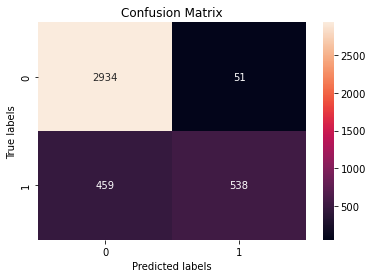

In [640]:
# Evaluation the model using the confusion matrix to make sure nothing has changed.

X_cm = feature_store_train
y_true_labels = labels_train
model = lg

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

No values has changed with confusion matrix as well.

In [641]:
# Running the error rate on the LogisticRegression
FP = 51
FN = 459
TP = 2934
TN = 538
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.12807634354595682


Same as before with the error rate the results are the same

##### Kneighbors classification model

#### Hyperparameter tuning

In [701]:
# Repeating the same steps but this time for Kneighbors parameters

params_KNN = {'n_neighbors': [1,2,3,4,5,6,7], 'p':[1,2,5]} #applying penalty in order to reduce overfitting
KN_model = KNeighborsClassifier()
clf = GridSearchCV(KN_model, params_KNN, cv=3, verbose = 1, n_jobs = -1)
bestF = clf.fit (feature_store_train, labels_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


In [703]:
# extract the best parameters out of the hyperparameter

bestF.best_params_

{'n_neighbors': 6, 'p': 2}

In [721]:
KN = KNeighborsClassifier(n_neighbors = 6, p = 2)
KN.fit(feature_store_train, labels_train)

# Predict and evaluate the model using the accuracy metric
model_predictions = KN.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8322175732217573
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1806
           1       0.76      0.46      0.57       584

    accuracy                           0.83      2390
   macro avg       0.80      0.71      0.73      2390
weighted avg       0.82      0.83      0.82      2390



Slight improvement acheived regarding the accuracy score (was 0.81 and became 0.83), the recall for catagory 0 became 0.95 (was 0.91), the f1 score now is 0.90 (was 0.88). 
The precision score for the catagory 1 became 0.76 (was 0.65) while the recall became 0.46 (was 0.54), and the f1 score now is 0.57 (was 0.59) which is recording a slight decrease in these values. 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2985
           1       0.84      0.52      0.64       997

    accuracy                           0.85      3982
   macro avg       0.85      0.74      0.77      3982
weighted avg       0.85      0.85      0.84      3982



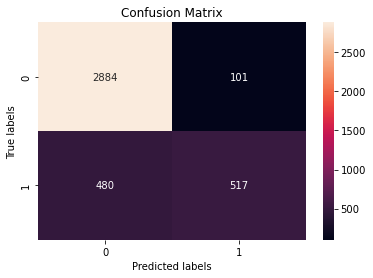

In [722]:
# Evaluating KNeighbors using the confusion matrix after the new results

X_cm = feature_store_train
y_true_labels = labels_train
model = KN

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

FP is 101 (was 177), TP is 2884 (was 2934), FN is 480 (was 459), TN is 517 (was 538.
A very slight increase with the values acheived

In [646]:
# Kneighbors misclassification rate
FP = 101
FN = 480
TP = 2884
TN = 517
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.14590657960823708


The rate was 0.13 and became 0.14

In [723]:
# Saving the logisticRegression model using pickle
## https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
## https://www.youtube.com/watch?v=KfnhNlD8WZI&ab_channel=codebasics

import pickle

with open ('LogisticRegression_model', 'wb') as lgmodel:
    pickle.dump (lg, lgmodel)

In [724]:
# Saving the KNeighbors model using pickle
import pickle

with open ('KNeighbors_model', 'wb') as KNeighborsmodel:
    pickle.dump (KN, KNeighborsmodel)

In [725]:
# loading the logisticRegression model (the best model)

with open ('LogisticRegression_model', 'rb') as lgmodel:
    mp_lg_pkl = pickle.load (lgmodel)

In [726]:
# loading the logisticRegression model (the best model)

with open ('KNeighbors_model', 'rb') as KNeighborsmodel:
    mp_kn_pkl = pickle.load (KNeighborsmodel)

In [727]:
# merging train and valid data sets
## https://www.codegrepper.com/code-examples/python/How+to+Merge+train+and+Test+dataset+in+python

merged_dset=train_csv.append(valid_csv)
merged_dset.shape

C:\Users\amera\AppData\Local\Temp\ipykernel_11824\2976636452.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_dset=train_csv.append(valid_csv)


(5600, 10)

In [728]:
merged_dset.head(10)

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,life potty: 10 world's great public bathrooms ...,"oyster.com, contributor\nthe hotel tell-all",https://www.huffingtonpost.com/entry/potty-tal...,who hasn't ducked into a hotel to make use of ...,6/29/2012,68,88,life potty: 10 world's great public bathrooms ...,1
1,travel,116-floor-high edge walk atop toronto's cn tower,"margie goldsmith, contributor\nhas traveled to...",https://www.huffingtonpost.com/entry/doing-the...,this is the scariest thing i have ever agreed ...,8/2/2012,58,238,116-floor-high edge walk atop toronto's cn tower,1
2,travel,athens august: truly heavenly!,"justine frangouli-argyris, contributor\njourna...",https://www.huffingtonpost.com/entry/athens-in...,"with the heavenly winds or ""meltemia"" of the a...",8/15/2013,33,277,athens august: truly heavenly!,1
3,travel,7 travel apps thanksgiving holiday travel,no_authors,https://www.huffingtonpost.com/entry/7-travel-...,mycityway if you're headed to new york city fo...,11/12/2012,49,127,7 travel apps thanksgiving holiday travel,1
4,travel,japan's toughness face disaster,"thomas shomaker, contributor\nvideo producer",https://www.huffingtonpost.com/entry/rikuzenta...,seeing the japanese care for each other and re...,3/11/2012,41,129,japan's toughness face disaster,1
5,travel,homecoming new friend haiti (video),"jeroen swolfs, contributor\nfreelance photojou...",https://www.huffingtonpost.com/entry/shooting-...,it turned out that carnival was just about the...,5/11/2012,46,82,homecoming new friend haiti (video),1
6,travel,eating austin: hometown suggestions sxsw foodies,"greg garrett, contributor\nauthor, speaker, an...",https://www.huffingtonpost.com/entry/eating-au...,"sure, you could go to a starbucks. but just up...",3/5/2013,52,179,eating austin: hometown suggestions sxsw foodies,1
7,travel,9 romantic resorts fit celeb couples,"joy pecknold, contributor\nfashion and travel ...",https://www.huffingtonpost.com/entry/9-romanti...,from gwyneth paltrow's secret wedding spot to ...,2/4/2014,40,157,9 romantic resorts fit celeb couples,1
8,travel,afternoon africa's hunting dogs,"lindblad expeditions, contributor\npioneers in...",https://www.huffingtonpost.com/entry/africas-h...,"under the watchful eye of an adult, the cubs p...",8/27/2012,39,169,afternoon africa's hunting dogs,1
9,travel,best ice cream sandwich parlors u.s.,"minitime, contributorwww.minitime.com",https://www.huffingtonpost.com/entry/best-ice-...,ice cream is arguably the one dessert that eve...,8/10/2014,43,196,best ice cream sandwich parlors u.s.,1


In [729]:
merged_dset.tail(10)

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
790,weird news,blt-errifying! dead rodent found subway sandwich,whitney meers,https://www.huffingtonpost.com/entry/dead-mous...,"“it’s the funniest thing i’ve ever seen, but i...",10/14/2015,51,76,blt-errifying! dead rodent found subway sandwich,2
791,travel,"laugharne, wales: heart dylan thomas trail","emilie c. harting, contributor\nwriter",https://www.huffingtonpost.com/entry/laugharne...,"in laugharne, a small coastal town twenty mile...",9/6/2013,49,101,"laugharne, wales: heart dylan thomas trail",1
792,travel,spirit airlines carry-on fee raised much $100,no_authors,https://www.huffingtonpost.com/entry/spirit-ai...,spirit is currently in hot water with veterans...,5/2/2012,54,122,spirit airlines carry-on fee raised much $100,1
793,travel,signing name piece musical history red rocks a...,"pam grout, contributor\nauthor, national geogr...",https://www.huffingtonpost.com/entry/red-rocks...,the thing that's so amazing about red rocks be...,4/19/2013,71,198,signing name piece musical history red rocks a...,1
794,travel,retaking green wedding vows hotel bel-air,no_authors,https://www.huffingtonpost.comhttp://www.luxec...,"in 1984, my wedding including the location, ca...",12/7/2012,52,120,retaking green wedding vows hotel bel-air,1
795,travel,five travel tips hurricane season,"jeanenne tornatore, contributor\ntravel trend ...",https://www.huffingtonpost.com/entry/five-trav...,"hurricane season is in full swing, with brewin...",9/1/2012,37,331,five travel tips hurricane season,1
796,weird news,banjo-playing suspect serenades cops bizarre s...,andres jauregui,https://www.huffingtonpost.com/entry/andrew-he...,there was no encore.,7/29/2015,56,20,banjo-playing suspect serenades cops bizarre s...,2
797,travel,7 twitter accounts make next trip zillion time...,suzy strutner,https://www.huffingtonpost.com/entry/best-twit...,the restaurant you've got your eye on lots of ...,1/14/2014,71,123,7 twitter accounts make next trip zillion time...,1
798,travel,politics discretion little places,"thomas a. shakely, contributor\ncontent strate...",https://www.huffingtonpost.com/entry/the-polit...,i'm sitting here in the queen mary pub in a sm...,5/22/2013,43,202,politics discretion little places,1
799,weird news,feast eyes 7 brilliant 3d chalk illustrations,steven hoffer,https://www.huffingtonpost.com/entry/chalk-art...,it's about to get real.,11/20/2015,59,23,feast eyes 7 brilliant 3d chalk illustrations,2


### Performing cross validation on the merged data sets (merged_dset)

In [730]:
# Splitting the dataset
X = merged_dset.loc[:,"tokenized_headlines"] # The data
y = merged_dset.loc[:,"category_encoded"] # the target

In [731]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test = train_test_split(X, y, random_state=0, test_size = 0.30)

In [732]:
# Victorize and store all the data features

feature_train = vectorizer.fit_transform (X_train).toarray()
lab_train = y_train
feature_test = vectorizer.fit_transform (X_test).toarray()
lab_test = y_test

In [733]:
X

0      life potty: 10 world's great public bathrooms ...
1       116-floor-high edge walk atop toronto's cn tower
2                         athens august: truly heavenly!
3              7 travel apps thanksgiving holiday travel
4                        japan's toughness face disaster
                             ...                        
795                    five travel tips hurricane season
796    banjo-playing suspect serenades cops bizarre s...
797    7 twitter accounts make next trip zillion time...
798                    politics discretion little places
799        feast eyes 7 brilliant 3d chalk illustrations
Name: tokenized_headlines, Length: 5600, dtype: object

In [734]:
y

0      1
1      1
2      1
3      1
4      1
      ..
795    1
796    2
797    1
798    1
799    2
Name: category_encoded, Length: 5600, dtype: int64

In [735]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [736]:
# Running the cross validation on logisticsRegression saved model

In [737]:
mp_lg_pkl.fit(feature_train, lab_train)

LogisticRegression(C=1)

In [738]:
## https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=871s&ab_channel=codebasics
cross_val_score(mp_lg_pkl, feature_train, lab_train)

array([0.84567127, 0.85570891, 0.85301508, 0.86683417, 0.85301508])

In [739]:
# Running the cross validation on KNeighbors

In [742]:
mp_kn_pkl.fit(feature_train, lab_train)

KNeighborsClassifier(n_neighbors=6)

In [743]:
cross_val_score(mp_kn_pkl , feature_train, lab_train)

array([0.80677541, 0.81806775, 0.81909548, 0.82663317, 0.82286432])

In [666]:
# WE can notice that the accuracy results of the KNeighbors model are lower than the ones of the logistics regression's 
# which also confirm's that the logistics regression is the best model for this dataset, the logistics regression achieved 0.87 before cross validation
# and after cross validation the result became 0.86, while the result of the KNeighbors was 0.85 and became 0.82 after cross validation.

### Applying the best model to the test.csv data set

In [667]:
# Loading the test dataset
test_csv = pd.read_csv('test.csv')

In [668]:
test_csv

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,romania got name...and lost historic treasures,"rick steves, contributorauthor of european tra...",https://www.huffingtonpost.com/entry/how-roman...,no_description,6/4/2016,58,14,romania got name...and lost historic treasures,1
1,weird news,'maxi pad bandit' arrested despite fiendishly ...,david moye,https://www.huffingtonpost.com/entry/gary-vict...,maybe he just wasn't feeling so fresh.,10/5/2015,61,38,'maxi pad bandit' arrested despite fiendishly ...,2
2,weird news,guy's attempt take rattlesnake selfie ends $15...,simon mccormack,https://www.huffingtonpost.com/entry/rattlesna...,let thissss be a cautionary tale.,7/25/2015,64,33,guy's attempt take rattlesnake selfie ends $15...,2
3,travel,woman turns missed flight airport staff dance ...,suzy strutner,https://www.huffingtonpost.com/entry/airport-m...,"she recruited gate agents to dance to ""all nig...",9/26/2017,63,61,woman turns missed flight airport staff dance ...,1
4,travel,7 places delight inner child,no_authors,https://www.huffingtonpost.com/entry/inner-chi...,1. swing at the end of the world located in ba...,1/19/2014,43,126,7 places delight inner child,1
...,...,...,...,...,...,...,...,...,...,...
1595,travel,face it: hotspot stay cool?,"michele willens, contributorjournalist, theatr...",https://www.huffingtonpost.com/entry/face-it-c...,no_description,6/29/2015,36,14,face it: hotspot stay cool?,1
1596,travel,australia giving us major wanderlust right,carly ledbetter,https://www.huffingtonpost.com/entry/kakadu-na...,no_description,10/23/2014,49,14,australia giving us major wanderlust right,1
1597,no_category,no_headline,no_authors,no_link,no_description,no_date,11,14,no_headline,0
1598,travel,friendliest taxi driver paris,"jerry lanson, contributor\nemerson college jou...",https://www.huffingtonpost.com/entry/paris-fri...,for those who rag against parisians as rude an...,8/3/2012,36,98,friendliest taxi driver paris,1


In [669]:
test_csv['category_encoded'].value_counts()

1    1167
2     423
0      10
Name: category_encoded, dtype: int64

In [670]:
test_csv.isnull().sum()

category               0
headline               0
authors                0
link                   0
short_description      0
date                   0
hd_length              0
short_des              0
tokenized_headlines    0
category_encoded       0
dtype: int64

In [671]:
# Gettiing rid of the values with no meaning

test_csv[test_csv["headline"].str.contains("no_headline")==False]

,category,headline,authors,link,short_description,date,hd_length,short_des,tokenized_headlines,category_encoded
0,travel,romania got name...and lost historic treasures,"rick steves, contributorauthor of european tra...",https://www.huffingtonpost.com/entry/how-roman...,no_description,6/4/2016,58,14,romania got name...and lost historic treasures,1
1,weird news,'maxi pad bandit' arrested despite fiendishly ...,david moye,https://www.huffingtonpost.com/entry/gary-vict...,maybe he just wasn't feeling so fresh.,10/5/2015,61,38,'maxi pad bandit' arrested despite fiendishly ...,2
2,weird news,guy's attempt take rattlesnake selfie ends $15...,simon mccormack,https://www.huffingtonpost.com/entry/rattlesna...,let thissss be a cautionary tale.,7/25/2015,64,33,guy's attempt take rattlesnake selfie ends $15...,2
3,travel,woman turns missed flight airport staff dance ...,suzy strutner,https://www.huffingtonpost.com/entry/airport-m...,"she recruited gate agents to dance to ""all nig...",9/26/2017,63,61,woman turns missed flight airport staff dance ...,1
4,travel,7 places delight inner child,no_authors,https://www.huffingtonpost.com/entry/inner-chi...,1. swing at the end of the world located in ba...,1/19/2014,43,126,7 places delight inner child,1
...,...,...,...,...,...,...,...,...,...,...
1594,travel,gangnam style hotels seoul,"claudine williams, contributor\ntravel writer ...",https://www.huffingtonpost.com/entry/gangnam-s...,"to those who live and visit there, seoul's gan...",10/31/2012,29,104,gangnam style hotels seoul,1
1595,travel,face it: hotspot stay cool?,"michele willens, contributorjournalist, theatr...",https://www.huffingtonpost.com/entry/face-it-c...,no_description,6/29/2015,36,14,face it: hotspot stay cool?,1
1596,travel,australia giving us major wanderlust right,carly ledbetter,https://www.huffingtonpost.com/entry/kakadu-na...,no_description,10/23/2014,49,14,australia giving us major wanderlust right,1
1598,travel,friendliest taxi driver paris,"jerry lanson, contributor\nemerson college jou...",https://www.huffingtonpost.com/entry/paris-fri...,for those who rag against parisians as rude an...,8/3/2012,36,98,friendliest taxi driver paris,1


In [672]:
# Drop all the 0 values from the "category_encoded" column
# I noticed that sometimes around 10 of the 0 values show up for the empty rows that I filled with some data to avoid keeping them empty. 
test_csv = test_csv[test_csv.category_encoded != 0]

In [673]:
# I already did the data cleaning on the file so I don't need to do it again


In [674]:
feature_store_test.shape

(2390, 300)

In [675]:
labels_test.shape

(2390,)

In [676]:
# Make sure the data set is not containing any null values
test_csv.isnull().sum()

category               0
headline               0
authors                0
link                   0
short_description      0
date                   0
hd_length              0
short_des              0
tokenized_headlines    0
category_encoded       0
dtype: int64

In [677]:
feature_store_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48064878],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [678]:
labels_test

5216    0
5366    0
6054    0
5907    0
274     0
       ..
7686    0
2161    0
4309    0
7293    0
1037    1
Name: category_encoded, Length: 2390, dtype: int64

In [744]:
# Applying the LogisticRegression model (from cross validation) saved model to the test.csv file

mp_lg_pkl.fit(feature_store_test, labels_test)
model_predictions = mp_lg_pkl.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8748953974895397
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1806
           1       0.94      0.52      0.67       584

    accuracy                           0.87      2390
   macro avg       0.90      0.76      0.80      2390
weighted avg       0.88      0.87      0.86      2390



              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1806
           1       0.94      0.52      0.67       584

    accuracy                           0.87      2390
   macro avg       0.90      0.76      0.80      2390
weighted avg       0.88      0.87      0.86      2390



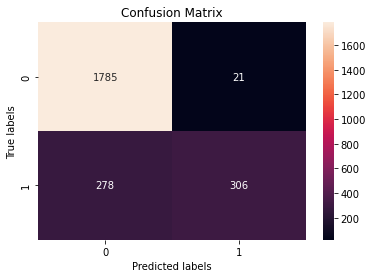

In [745]:
# Applying the LogisticRegression saved model to the test.csv set
X_cm = feature_store_test
y_true_labels = labels_test
model = mp_lg_pkl

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [681]:
# The prediction model's (accuracy, recall,and the f1) results are quite similar to the validation ones, the only very slight differences were in the precision and recall (with a difference of 0.01 only)
# The confusion matrix results for validation were 0.87 for accuracy while the test's accuracy is 0.84, the recall and f1 results are a bit different for the validation set/category 1 (0.51 and 0.66 respectively) while they are 0.39 and 0.54 for the test set,
# which means the algorithm is not returniing enough of relevant results.
# however, the preceision is almost the same 0.95 and 0.90.which are still high which is good indication,
# it's returning more relevant resulta than the irrelevant ones.

### Applying the best classifier to the test set

In [682]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression(C=1, penalty = 'l2')
lg.fit(feature_store_test, labels_test)

# Predict and evaluate the model using the accuracy metric
model_predictions = lg.predict(feature_store_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(metrics.classification_report(labels_test,model_predictions))

Accuracy 0.8748953974895397
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1806
           1       0.94      0.52      0.67       584

    accuracy                           0.87      2390
   macro avg       0.90      0.76      0.80      2390
weighted avg       0.88      0.87      0.86      2390



              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1806
           1       0.94      0.52      0.67       584

    accuracy                           0.87      2390
   macro avg       0.90      0.76      0.80      2390
weighted avg       0.88      0.87      0.86      2390



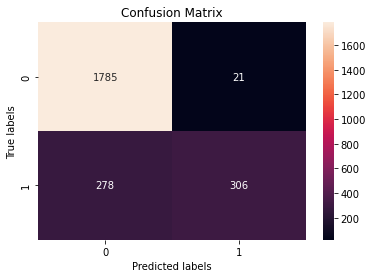

In [747]:
# Applying the confusion matrix on the test set

X_cm = feature_store_test
y_true_labels = labels_test
model = lg

y_pred = model.predict(X_cm)
print(metrics.classification_report(y_true_labels, y_pred))

cm=confusion_matrix(y_true_labels, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
# After applying the best model on the test set, it produced exactly the same results of the validation
# so no difference has happend. 